# Prosper Loan Data Exploration
## by Roselyn N. Kinuthia

## Investigation Overview

The main objective of this presentation is to highlight the factors affecting the loan status. I will focus on prosper rating, prosper score, loan original amount and employment status.

## Dataset Overview

This data set contains information on peer to peer loans facilitated by credit company Prosper. There are 113,937 loans with 81 variables. However, I chose a few variables to focus on in my analysis. These were: 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','EmploymentStatus', 'DelinquenciesLast7Years', 'StatedMonthlyIncome' 'TotalProsperLoans', 'LoanOriginalAmount','LoanOriginationDate', 'Recommendations', 'Investors'.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#choosing a few columns
selected_target_columns =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)','EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]
df2 = df[selected_target_columns]

In [4]:
#Data cleaning
df2 = df2.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df2['LoanOriginationDate'] = pd.to_datetime(df2['LoanOriginationDate'])
df2['TotalProsperLoans'] = df2['TotalProsperLoans'].fillna(0)
df2 = df2[df2.ProsperScore <= 10]

In [5]:
#Just checking the data
df2.head(3)
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83397 entries, 0 to 84852
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      83397 non-null  int64         
 1   Term                       83397 non-null  int64         
 2   LoanStatus                 83397 non-null  object        
 3   BorrowerAPR                83397 non-null  float64       
 4   BorrowerRate               83397 non-null  float64       
 5   ProsperRating (Alpha)      83397 non-null  object        
 6   ProsperScore               83397 non-null  float64       
 7   ListingCategory (numeric)  83397 non-null  int64         
 8   EmploymentStatus           83397 non-null  object        
 9   DelinquenciesLast7Years    83397 non-null  float64       
 10  StatedMonthlyIncome        83397 non-null  float64       
 11  TotalProsperLoans          83397 non-null  float64       
 12  Loan

,index,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,83397.000000,8.339700e+04,83397.000000,83397.000000,83397.000000,83397.000000
mean,56960.167068,42.482248,0.228663,0.197815,5.861902,3.316222,3.698634,5.880222e+03,0.329173,8982.621185,0.017291,67.810161
std,32903.815432,11.654919,0.079011,0.073931,2.300729,4.363780,9.396220,8.271991e+03,0.709997,6202.474999,0.187729,94.190355
min,1.000000,12.000000,0.045830,0.040000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,1.000000
25%,28472.000000,36.000000,0.167320,0.139600,4.000000,1.000000,0.000000,3.416667e+03,0.000000,4000.000000,0.000000,1.000000
50%,56969.000000,36.000000,0.221400,0.189900,6.000000,1.000000,0.000000,5.000000e+03,0.000000,7500.000000,0.000000,32.000000
75%,85473.000000,60.000000,0.293410,0.257900,8.000000,3.000000,2.000000,7.083333e+03,0.000000,13000.000000,0.000000,96.000000
max,113936.000000,60.000000,0.423950,0.360000,10.000000,20.000000,99.000000,1.750003e+06,8.000000,35000.000000,19.000000,1189.000000


In [6]:
# Finally, i will convert prosper rating into ordered categorical type
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df2[var] = df2[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Status

Most of the featured loans are current loans. The loans that are past due are split into several buckets depending on the days past due. The loans that are completed also contribute a substantial proportion of total loans.

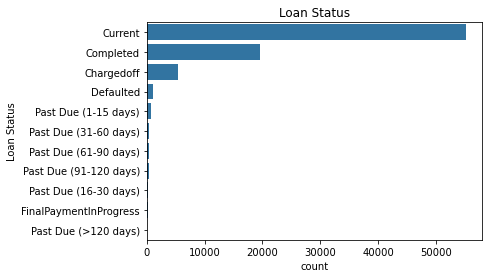

In [7]:
#Setting the color
base_color = sns.color_palette()[0]
# Plot the loan status on a Horizontal bar chart
loanstatus_order = df2['LoanStatus'].value_counts().index
ax = sns.countplot(data = df2, y='LoanStatus', color = base_color, order = loanstatus_order)
ax.set_title('Loan Status')
ax.set_ylabel('Loan Status');

In [8]:
#Preparing the loan status column
condition = (df2['LoanStatus'] == 'Completed') | (df2['LoanStatus'] == 'Defaulted') |\
                  (df2['LoanStatus'] == 'Chargedoff')
df2 = df2[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df2['LoanStatus'] = df2.apply(change_to_defaulted, axis=1)
df2['LoanStatus'].value_counts()

Completed    19633
Defaulted     6340
Name: LoanStatus, dtype: int64

## Loan status and Prosper rating

Most of the defaulters have a lower rating compared to the borrowers who have completed paying off their loans.

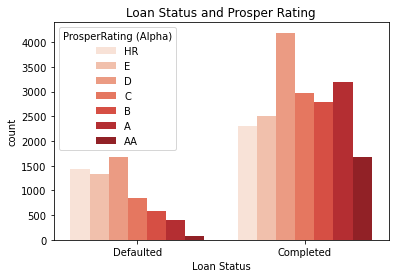

In [9]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds')
ax.set_title('Loan Status and Prosper Rating')
ax.set_xlabel('Loan Status');

## Loan Status and Prosper Score

The defaulters have lower prosper scores whereas the ones who have completed their loans have higher scores.


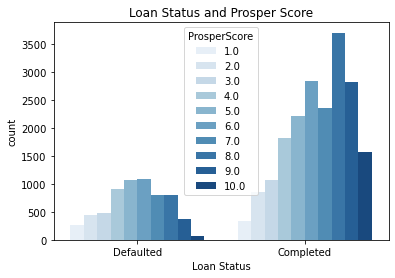

In [10]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'ProsperScore', palette = 'Blues')
ax.set_title('Loan Status and Prosper Score')
ax.set_xlabel('Loan Status');

## Loan Status and Employment status

Comparing both the defaulters and the ones who have completed, we see that majority of them are employed irrespective of the loan status.


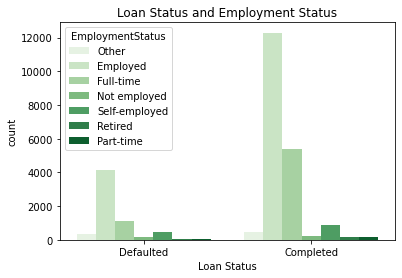

In [11]:
ax = sns.countplot(data = df2, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Greens')
ax.set_title('Loan Status and Employment Status')
ax.set_xlabel('Loan Status');

## Prosper rating, loan amount and loan status

Majority of the defaulters have lower prosper ratings and the original loan amounts involved are higher compared to the category of borrowers who have completed paying off their loans.

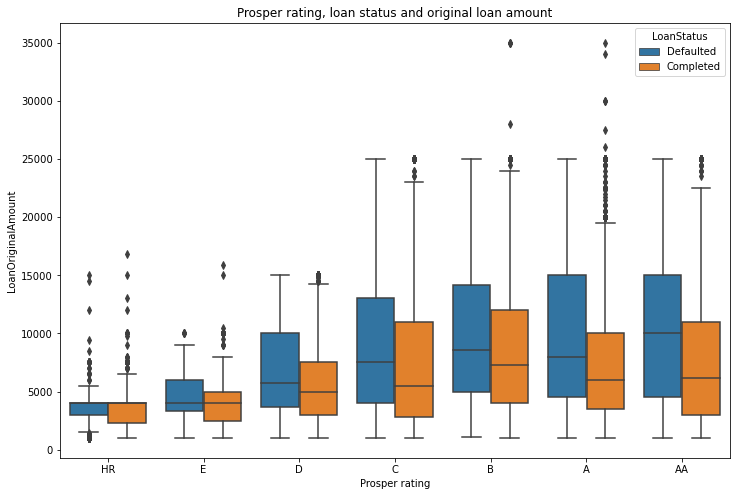

In [12]:
plt.figure(figsize = [12, 8])
ax = sns.boxplot(data=df2, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus')
ax.set_title('Prosper rating, loan status and original loan amount')
ax.set_xlabel('Prosper rating');

In [14]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 679977 bytes to slide_deck_template.slides.html
